# Task 1: Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

#### Step 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')

# Display the first few rows
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:
# Check columns
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [3]:
# Get Summary statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
# Check for missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

There are no missing values in this dataset.

#### Visualizations for Insights

Numerical columns:
['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


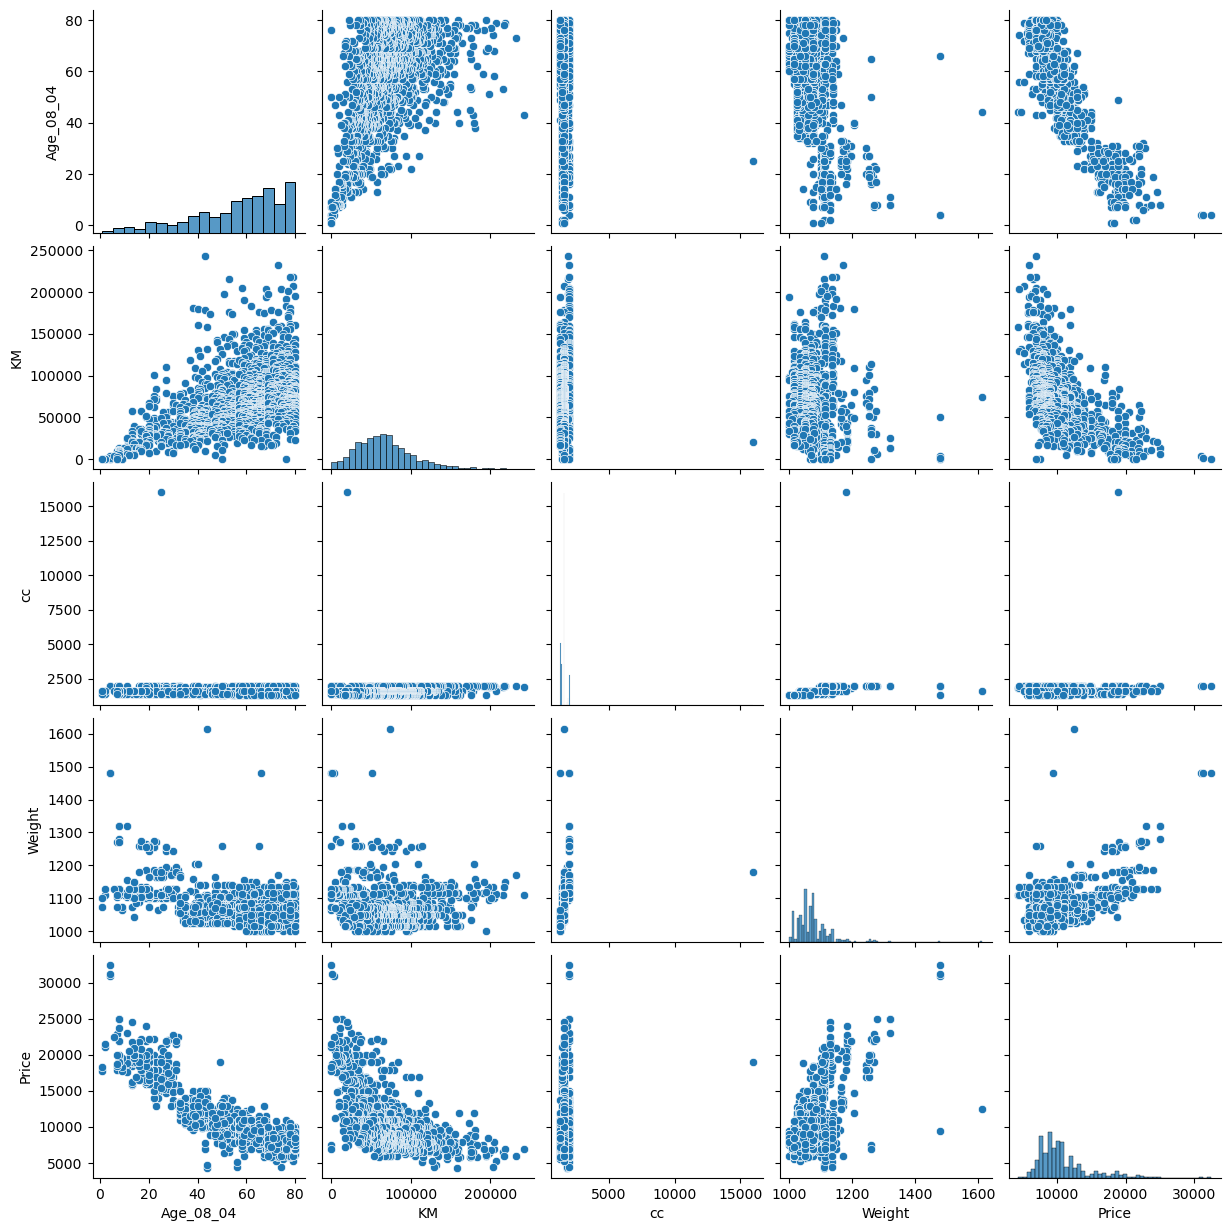

In [5]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:")
print(numerical_columns)

# Pairplot for numerical variables
sns.pairplot(df[['Age_08_04', 'KM', 'cc', 'Weight', 'Price']])
plt.show()

Categorical columns:
['Fuel_Type']


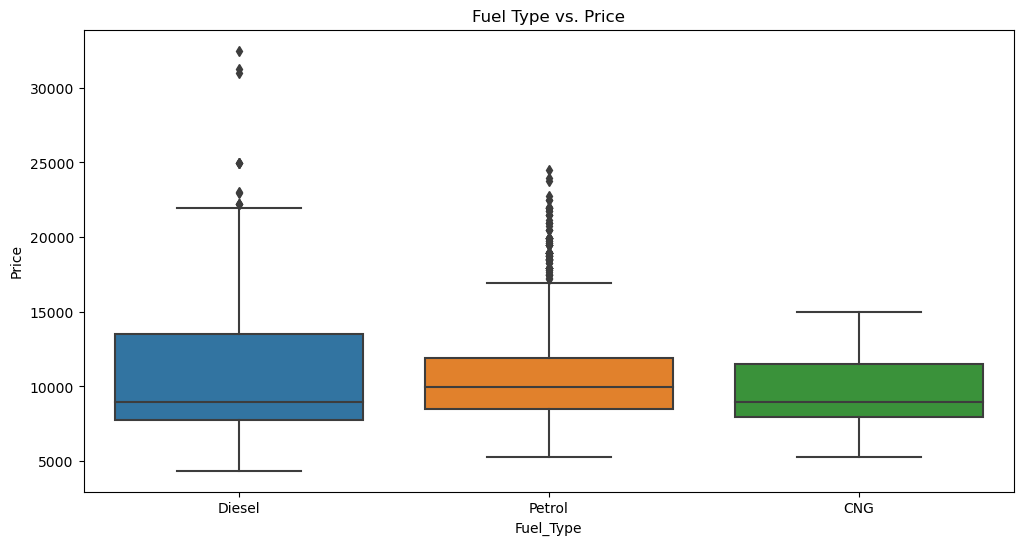

In [6]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:")
print(categorical_columns)

# Boxplot for categorical variables vs. Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Fuel Type vs. Price')
plt.show()

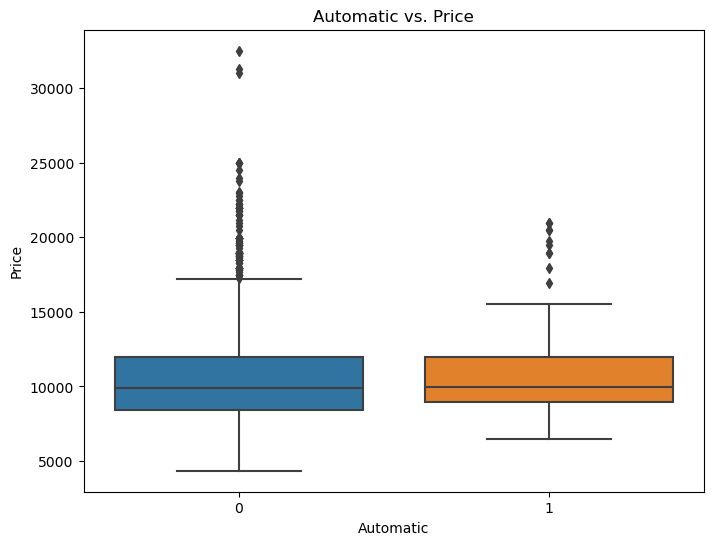

In [7]:
# Considering 'Automatic' column as categorical based on the dataset description
plt.figure(figsize=(8, 6))
sns.boxplot(x='Automatic', y='Price', data=df)
plt.title('Automatic vs. Price')
plt.show()

#### Step 2: Data Preprocessing

In [8]:
# Handling Categorical Variables

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Drop irrelevant columns (if any)
df.drop(['Doors'], axis=1, inplace=True)  # Assuming 'Doors' is not relevant for prediction
df.drop(['Cylinders'], axis=1, inplace=True)  # Assuming 'Cylinders' is not relevant for prediction
df.drop(['Weight'], axis=1, inplace=True)  # Assuming 'Weight' is not relevant for prediction


# Check the modified dataset
print(df.head())
print(df.columns)

   Price  Age_08_04     KM  HP  Automatic    cc  Gears  Fuel_Type_Diesel  \
0  13500         23  46986  90          0  2000      5              True   
1  13750         23  72937  90          0  2000      5              True   
2  13950         24  41711  90          0  2000      5              True   
3  14950         26  48000  90          0  2000      5              True   
4  13750         30  38500  90          0  2000      5              True   

   Fuel_Type_Petrol  
0             False  
1             False  
2             False  
3             False  
4             False  
Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Gears',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


# Task 2: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [9]:
# Separate target variable (e.g., 'Price') and predictors (features)
X = df.drop('Price', axis=1)  # Features (all columns except 'Price')
y = df['Price']  # Target variable ('Price')

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes to verify the split
print("Training set - Features shape:", X_train.shape)
print("Testing set - Features shape:", X_test.shape)
print("Training set - Target shape:", y_train.shape)
print("Testing set - Target shape:", y_test.shape)

Training set - Features shape: (1148, 8)
Testing set - Features shape: (288, 8)
Training set - Target shape: (1148,)
Testing set - Target shape: (288,)


# Task 3: Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [10]:
# Model 1: Using All Numerical Features

model1 = LinearRegression()
model1.fit(X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Gears']], y_train)

# Predictions on the testing data
y_pred1 = model1.predict(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Gears']])

# Model evaluation
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# Coefficients and Intercept
print("\nModel 1 - Coefficients:")
for feature, coef in zip(X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Gears']].columns, model1.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model1.intercept_)
print("Mean Squared Error (MSE):", mse1)
print("R-squared (R2) Score:", r2_1)


Model 1 - Coefficients:
Age_08_04: -151.49490209114794
KM: -0.012777300526768141
HP: 32.01477159362977
cc: 0.44746854099010874
Gears: 532.6162741468414
Intercept: 13463.555679838462
Mean Squared Error (MSE): 2471131.437234688
R-squared (R2) Score: 0.8147964817414358


#### Interpretation of the Coefficients:

1. Coefficients:
   1. Age_08_04: For each year decrease in age of the car, the price decreases by approximately €151.49.
   2. KM: For each kilometer increase in mileage, the price decreases by approximately €0.0128.
   3. HP: For each unit increase in horsepower, the price increases by approximately €32.01.
   4. cc: For each unit increase in engine cylinder volume (cc), the price increases by approximately €0.45.
   5. Gears: For each additional gear, the price increases by approximately €532.62.
2. Intercept: The baseline price of a car when all predictors are zero is €13,463.56.
3. Mean Squared Error (MSE): This measures the average squared difference between predicted values and actual values. Lower values indicate better model performance.
4. R-squared (R2) Score: This represents the proportion of the variance in the dependent variable (car price) that is predictable from the independent variables. A higher R-squared value (close to 1) indicates a better fit of the model to the data.

In [11]:
# Model 2: Using select features

model2 = LinearRegression()
model2.fit(X_train[['Age_08_04', 'KM', 'cc']], y_train)

# Predictions on the testing data
y_pred2 = model2.predict(X_test[['Age_08_04', 'KM', 'cc']])

# Model evaluation
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

# Coefficients and Intercept
print("\nModel 2 - Coefficients:")
for feature, coef in zip(X_train[['Age_08_04', 'KM', 'cc']].columns, model2.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model2.intercept_)
print("Mean Squared Error (MSE):", mse2)
print("R-squared (R2) Score:", r2_2)


Model 2 - Coefficients:
Age_08_04: -150.54497804371908
KM: -0.017333689707562334
cc: 0.5186384955554334
Intercept: 19531.06812023367
Mean Squared Error (MSE): 2854346.811588824
R-squared (R2) Score: 0.7860756963911508


#### Interpretation of the Coefficients:

1. Coefficients:
    1. Age_08_04: For each year decrease in age of the car, the price decreases by approximately €150.54.
    2. KM: For each kilometer increase in mileage, the price decreases by approximately €0.0173.
    3. cc: For each unit increase in engine cylinder volume (cc), the price increases by approximately €0.52.
2. Intercept: The baseline price of a car when all predictors are zero is €19,531.07. 
3. Mean Squared Error (MSE): Higher compared to Model 1, indicating potentially poorer performance.
4. R-squared (R2) Score: Slightly lower compared to Model 1, indicating a slightly weaker fit.

In [12]:
# Model 3: Using Only Categorical Features

model3 = LinearRegression()
model3.fit(X_train[['Automatic', 'Fuel_Type_Diesel']], y_train)

# Predictions on the testing data
y_pred3 = model3.predict(X_test[['Automatic', 'Fuel_Type_Diesel']])

# Model evaluation
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

# Coefficients and Intercept
print("\nModel 3 - Coefficients:")
for feature, coef in zip(X_train[['Automatic', 'Fuel_Type_Diesel']].columns, model3.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model3.intercept_)
print("Mean Squared Error (MSE):", mse3)
print("R-squared (R2) Score:", r2_3)


Model 3 - Coefficients:
Automatic: 595.6015013318278
Fuel_Type_Diesel: 582.5322705625964
Intercept: 10654.706190975865
Mean Squared Error (MSE): 13267732.988749065
R-squared (R2) Score: 0.005625199936229119


#### Interpretation of Coefficients:

1. Coefficients:
    1. Fuel_Type_Diesel: Cars with diesel fuel type have, on average, a higher price by €582.53 compared to other fuel types.
    2. Automatic: Automatic transmission cars have, on average, a higher price by €595.60 compared to manual transmission cars.
2. Intercept: The baseline price of a car with manual transmission and non-diesel fuel type is €10,654.71.
3. Mean Squared Error (MSE): Highest among the models, indicating the poorest performance in predicting car prices.
4. R-squared (R2) Score: Very low, indicating that this model explains very little of the variance in car prices based on the predictors used.

### Overall Interpretation:

1. Positive Coefficients: A positive coefficient (e.g., HP, cc, Gears, Fuel_Type_Diesel, Automatic) indicates that as the respective feature increases, the price of the car tends to increase as well.
2. Negative Coefficients: A negative coefficient (e.g., Age_08_04, KM) indicates that as the respective feature increases, the price of the car tends to decrease.
3. Intercepts: The intercept represents the expected value of the dependent variable when all independent variables are zero.
4. Model Evaluation Metrics: MSE should be minimized, indicating better model prediction accuracy. R-squared should be maximized, indicating how well the model explains the variance in the target variable.

# Task 4: Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [13]:
# Generating predictions 'y_pred1', 'y_pred2', 'y_pred3' for each model
y_pred1 = model1.predict(X_test[['Age_08_04', 'KM', 'HP', 'cc', 'Gears']])
y_pred2 = model2.predict(X_test[['Age_08_04', 'KM', 'cc']])
y_pred3 = model3.predict(X_test[['Automatic', 'Fuel_Type_Diesel']])

# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)

# Calculate Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)

# Calculate R-squared (R2) score
r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)
r2_3 = r2_score(y_test, y_pred3)

# Print the evaluation metrics
print("Model 1 Performance:")
print(f"Mean Squared Error (MSE): {mse1}")
print(f"Root Mean Squared Error (RMSE): {rmse1}")
print(f"R-squared (R2) Score: {r2_1}")
print("\nModel 2 Performance:")
print(f"Mean Squared Error (MSE): {mse2}")
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print(f"R-squared (R2) Score: {r2_2}")
print("\nModel 3 Performance:")
print(f"Mean Squared Error (MSE): {mse3}")
print(f"Root Mean Squared Error (RMSE): {rmse3}")
print(f"R-squared (R2) Score: {r2_3}")

Model 1 Performance:
Mean Squared Error (MSE): 2471131.437234688
Root Mean Squared Error (RMSE): 1571.9832814742936
R-squared (R2) Score: 0.8147964817414358

Model 2 Performance:
Mean Squared Error (MSE): 2854346.811588824
Root Mean Squared Error (RMSE): 1689.4812255804513
R-squared (R2) Score: 0.7860756963911508

Model 3 Performance:
Mean Squared Error (MSE): 13267732.988749065
Root Mean Squared Error (RMSE): 3642.4899435343764
R-squared (R2) Score: 0.005625199936229119


# Task 5: Apply Lasso and Ridge methods on the model.

In [14]:
# Create Lasso and Ridge regression models
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed

# Fit the models on the training data
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics
print("Lasso Regression:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R2) Score: {r2_lasso}")
print("\nRidge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R2) Score: {r2_ridge}")

# Print coefficients
print("\nLasso Coefficients:")
for feature, coef in zip(X_train.columns, lasso_model.coef_):
    print(f"{feature}: {coef}")

print("\nRidge Coefficients:")
for feature, coef in zip(X_train.columns, ridge_model.coef_):
    print(f"{feature}: {coef}")

Lasso Regression:
Mean Squared Error (MSE): 2148074.7314264607
R-squared (R2) Score: 0.8390085643571867

Ridge Regression:
Mean Squared Error (MSE): 2150215.7464614487
R-squared (R2) Score: 0.8388481020235571

Lasso Coefficients:
Age_08_04: -141.14247497857363
KM: -0.0185560053878135
HP: 53.66904193847335
Automatic: 918.3433229460314
cc: 0.0412902154021182
Gears: 501.7821540507415
Fuel_Type_Diesel: 2627.573790952869
Fuel_Type_Petrol: 534.9088056363042

Ridge Coefficients:
Age_08_04: -141.199196692191
KM: -0.01859176549755965
HP: 53.13971625724631
Automatic: 900.1524731919491
cc: 0.04946811432798762
Gears: 500.94247570474363
Fuel_Type_Diesel: 2436.5550306400532
Fuel_Type_Petrol: 378.179584078986
